In [ ]:

import torch
import torch.optim as optim
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
#from celluloid import Camera
import seaborn as sns
import math
import pandas as pd
import warnings
from IPython.display import HTML
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
sns.set()

In [ ]:
# A = 1.0
# lr = 0.01
# path=dict()
# error=dict()
# # SGD, SGD + Momentum(lr=0.01, momentum=0.9), Adagrad, Adam

# initial = [[5.0],[5.0]]

# def rastrigin(x):
#   x, y = x[0], x[1]
#   return A *2 + [(x**2 - A * math.cos(2 * math.pi * x)) + (y**2 - A * math.cos(2 * math.pi * y)) for x]

# #x = torch.tensor(initial, requires_grad=True, dtype=torch.float)

In [ ]:
A = 10
def rastrigin(X): 
    return A*len(X) + sum([(x**2 - A * torch.cos(2 * math.pi * x)) for x in X])

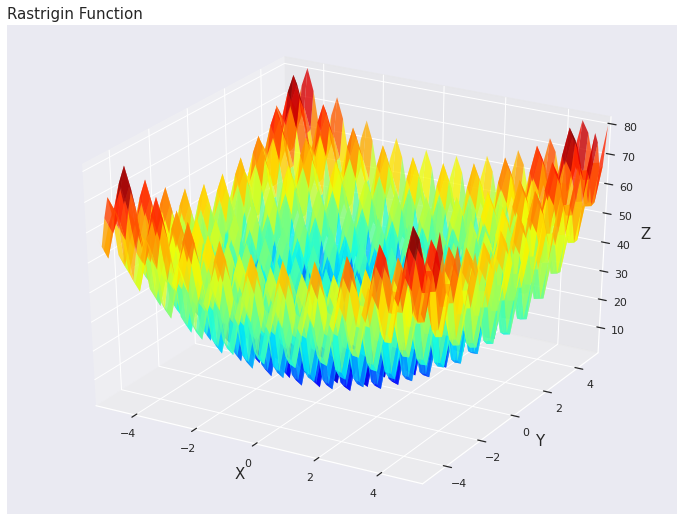

In [ ]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = rastrigin(torch.tensor([x, y])).numpy()
#Z = rastrygin([x,y])

fig = plt.figure(figsize=(12, 9))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_zlabel('Z', fontsize=15)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
ax.set_title("Rastrigin Function", loc='left', fontsize=15)
#plt.savefig("Rastrigin.svg", format='svg', bbox_inches='tight')
plt.show()

In [ ]:
def function_optimization(p, opt, name):
    xmin, xmax, xstep = -5.12, 5.12, .2
    ymin, ymax, ystep = -5.12, 5.12, .2
    x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
    z = rastrigin(torch.tensor([x, y])).numpy()

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

    path = np.empty((2,0))
    path = np.append(path, p.data.numpy(), axis=1)
    Itern = 100
    Eplot = np.zeros((Itern, 1))
    for i in range(Itern):
        opt.zero_grad()
        output = rastrigin(p)
        output.backward()
        opt.step()
        Eplot[i] = output.data.numpy()
        path = np.append(path, p.data.numpy(), axis=1)

    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    ax.plot(path[0], path[1], color='red', label=name, linewidth=7)
    ax.legend()
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_title(name + ' Path', fontsize=15)
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    #plt.savefig(name+ "_path.svg", format='svg', dpi=1200, bbox_inches='tight')
    plt.show()
    
    print("Final Stop: ", list(p.tolist()))
    print("Final Loss: ", Eplot[Itern-1])
    plt.figure(figsize=(8, 8))
    plt.plot(Eplot, color='g',linewidth=7.0)
    plt.title(name + " Loss Plot ", fontsize=15)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    #plt.savefig(name+ "_loss.svg", format='svg', dpi=1200, bbox_inches='tight')
    plt.show();

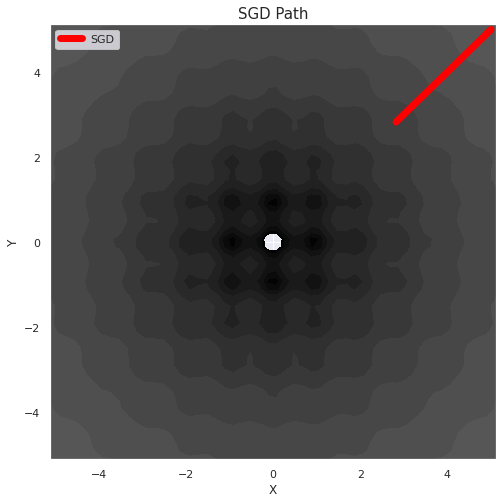

<Figure size 640x640 with 0 Axes>

Final Stop:  [[2.8223698139190674], [2.8223698139190674]]
Final Loss:  [17.05313301]


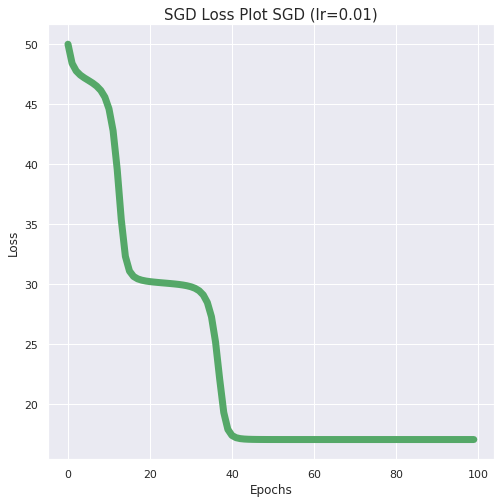

In [ ]:

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)
function_optimization(p, opt, 'SGD')

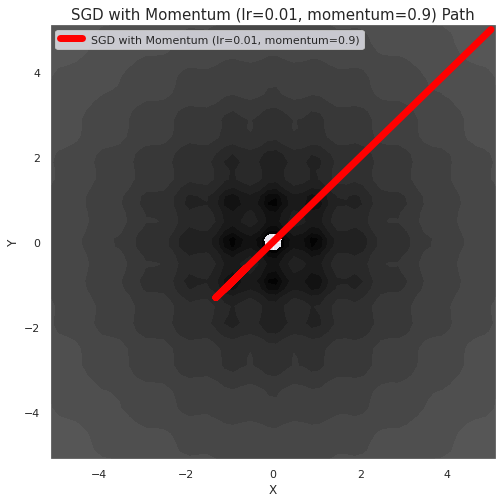

<Figure size 640x640 with 0 Axes>

Final Stop:  [[-0.9469558596611023], [-0.9469558596611023]]
Final Loss:  [1.90455127]


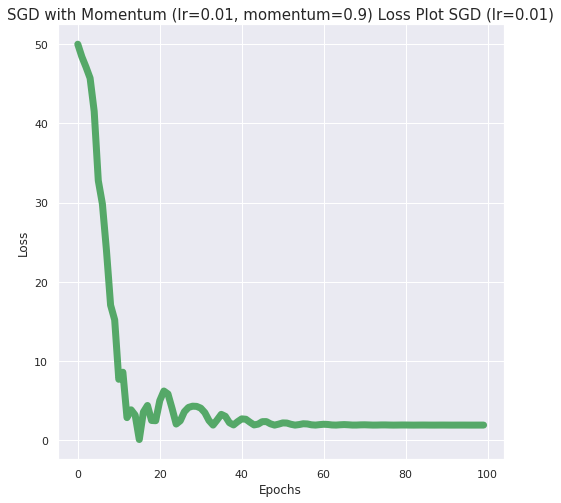

In [ ]:
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)
function_optimization(p, opt, 'SGD with Momentum (lr=0.01, momentum=0.9)')

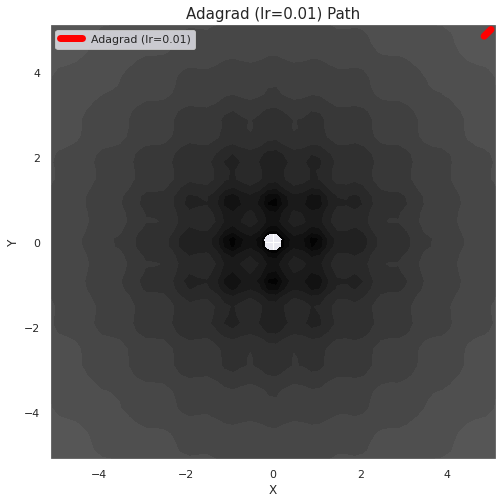

<Figure size 640x640 with 0 Axes>

Final Stop:  [[4.842288494110107], [4.842288494110107]]
Final Loss:  [47.80606842]


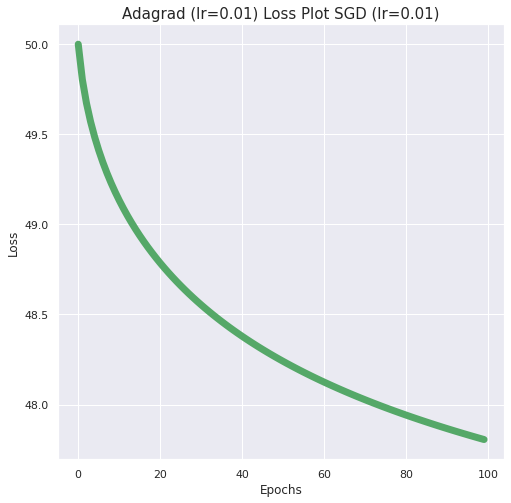

In [ ]:
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adagrad([p], lr=0.01)
function_optimization(p, opt, 'Adagrad (lr=0.01)')

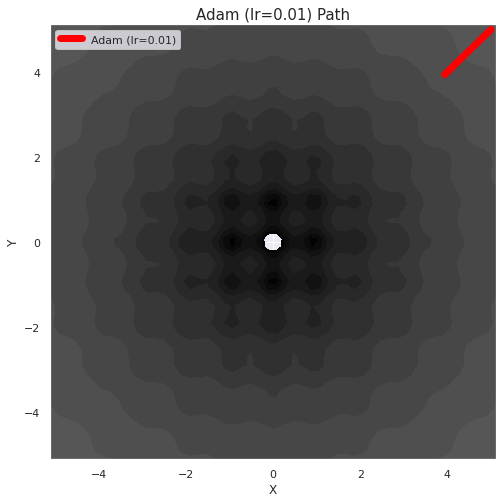

<Figure size 640x640 with 0 Axes>

Final Stop:  [[3.938631772994995], [3.938631772994995]]
Final Loss:  [31.29665375]


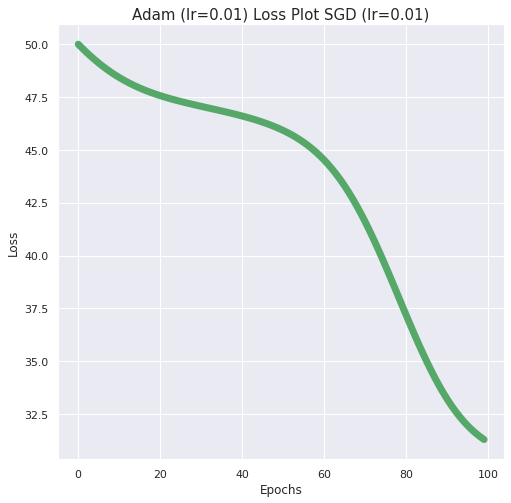

In [ ]:

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adam([p], lr=0.01)
function_optimization(p, opt, 'Adam (lr=0.01)')

In [ ]:

def function_optimization2(p, opt):
    path = np.empty((2,0))
    path = np.append(path, p.data.numpy(), axis=1)
    Itern = 100
    Eplot = np.zeros((Itern, 1))
    for i in range(Itern):
        opt.zero_grad()
        output = rastrigin(p)
        output.backward()
        opt.step()
        Eplot[i] = output.data.numpy()
        path = np.append(path, p.data.numpy(), axis=1)
        
    return path, Eplot

SGD Final Stop:  [2.8223698139190674, 2.8223698139190674]
SGD Final Loss:  [17.05313301]
SGD with Momentum Final Stop:  [-0.9469558596611023, -0.9469558596611023]
SGD with Momentum Final Loss:  [1.90455127]
ADAgrad Final Stop:  [4.842288494110107, 4.842288494110107]
ADAgrad Final Loss:  [47.80606842]
ADAM Final Stop:  [3.938631772994995, 3.938631772994995]
ADAM Final Loss:  [31.29665375]


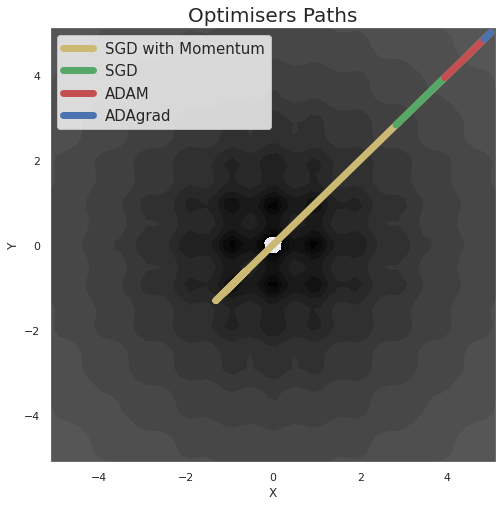

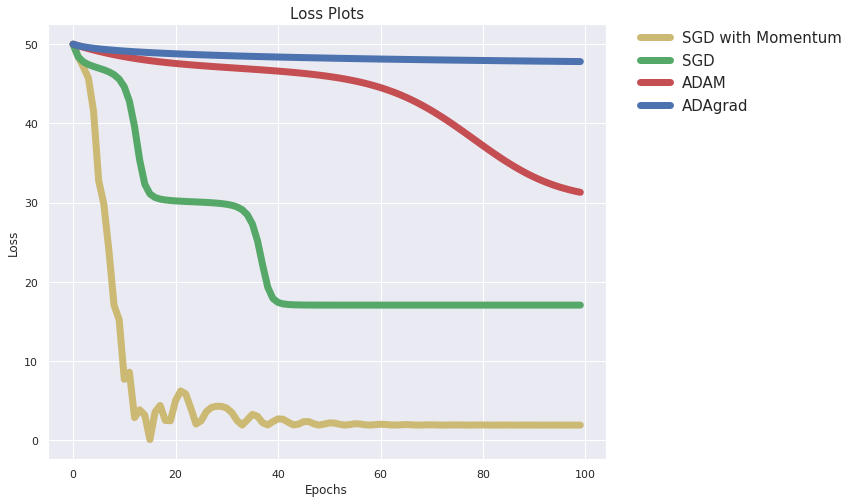

In [ ]:
name1, name2, name3, name4 = 'SGD', 'SGD with Momentum', 'ADAgrad', 'ADAM'
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)
path1, Eplot1 = function_optimization2(p, opt)

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)
path2, Eplot2 = function_optimization2(p, opt)

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adagrad([p], lr=0.01)
path3, Eplot3 = function_optimization2(p, opt)

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adam([p], lr=0.01)
path4, Eplot4 = function_optimization2(p, opt)

print(name1, "Final Stop: ", list(path1[:, 100].tolist()))
print(name1, "Final Loss: ", Eplot1[100-1])
print(name2, "Final Stop: ", list(path2[:, 100].tolist()))
print(name2, "Final Loss: ", Eplot2[100-1])
print(name3, "Final Stop: ", list(path3[:, 100].tolist()))
print(name3, "Final Loss: ", Eplot3[100-1])
print(name4, "Final Stop: ", list(path4[:, 100].tolist()))
print(name4, "Final Loss: ", Eplot4[100-1])


xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = rastrigin(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

#plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(path2[0], path2[1], label=name2, linewidth=7, color='y')
ax.plot(path1[0], path1[1], label=name1, linewidth=7, color='g')
ax.plot(path4[0], path4[1], label=name4, linewidth=7, color='r')
ax.plot(path3[0], path3[1], label=name3, linewidth=7, color='b')
ax.legend(fontsize=15, facecolor='w')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Optimisers Paths', fontsize=20)
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
#plt.savefig("path.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(Eplot2, label=name2, linewidth=7, color='y')
plt.plot(Eplot1, label=name1, linewidth=7, color='g')
plt.plot(Eplot4, label=name4, linewidth=7, color='r')
plt.plot(Eplot3, label=name3, linewidth=7, color='b')
plt.legend(fontsize=15, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., facecolor='w', edgecolor ='w')
plt.title("Loss Plots", fontsize=15)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
#plt.savefig("loss.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show();

2 Iris Optimisation (SVM)

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' + 'iris/iris.data', header=None)
df = df.sample(frac = 1, random_state = 0) #shuffle
df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])] # filter
# add label indices column
mapping = {k : v for v , k in enumerate(df[4].unique())}
df[5] = (2*df[4].map(mapping)) - 1 #labels in {−1 ,1}
# normalise data
alldata = torch.tensor(df.iloc[:,[0,1,2,3]].values, dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0))/alldata.var(dim=0)
# createdatasets
targetstr = torch.tensor(df.iloc[:75,5].values, dtype=torch.long)
targetsva = torch.tensor(df.iloc[75:,5].values, dtype=torch.long)
datatr = alldata[:75]
datava = alldata[75:]

In [ ]:
def hinge_loss(y_pred, y_true):
    return torch.mean(torch.max(torch.tensor(0, dtype=torch.float, requires_grad=True), 1-y_pred*y_true))

def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

In [ ]:

def svm_test(X, Y, opt, w, b, name):
    dataset = data.TensorDataset(X, Y) # create your datset
    dataloader = data.DataLoader(dataset, batch_size=25, shuffle=True) # create your dataloader
    Eplot = np.zeros((100, 1))
    Aplot = np.zeros((100, 1))
    for epoch in range(100):
        scores, errors = [], []
        for i, batch in enumerate(dataloader):
            opt.zero_grad()
            y_pred = svm(batch[0], w, b)
            
            y_target = [1 if i > 0 else -1 for i in y_pred]
            scores.append(accuracy_score(batch[1].detach().numpy(), y_target))
            
            output = hinge_loss(y_pred, batch[1].float())
            errors.append(output.data.numpy())
            
            output.backward()
            opt.step()
            
        Aplot[epoch] = np.mean(scores)
        Eplot[epoch] = sum(errors)/(i+1)

    print("Final Loss: ", Eplot[99][0])
    plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Eplot)
    plt.title("Loss Plot (" + name +")", fontsize=20)
    plt.xlabel("Iteration Number", fontsize=18)
    plt.ylabel("Loss", fontsize=18)
    plt.savefig(name+"_loss.svg", format='svg', dpi=1200, bbox_inches='tight')
    
    print("Final Accuracy: ", Aplot[99][0])
    plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Aplot)
    plt.title("Training Accuracy (" + name +")", fontsize=20)
    plt.xlabel("Iteration Number", fontsize=18)
    plt.ylabel("Accuracy (%)", fontsize=18)
    plt.savefig(name+"_acc.svg", format='svg', dpi=1200, bbox_inches='tight')
    
    return w, b

Final Loss:  0.18436136841773987
Final Accuracy:  0.9333333333333332


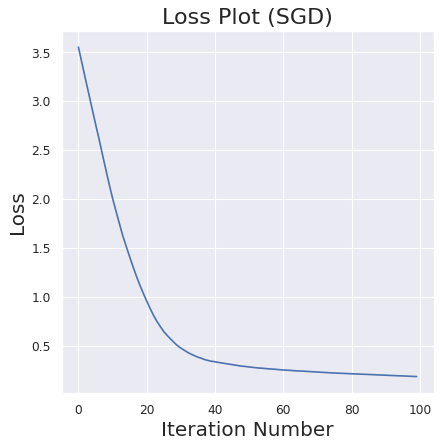

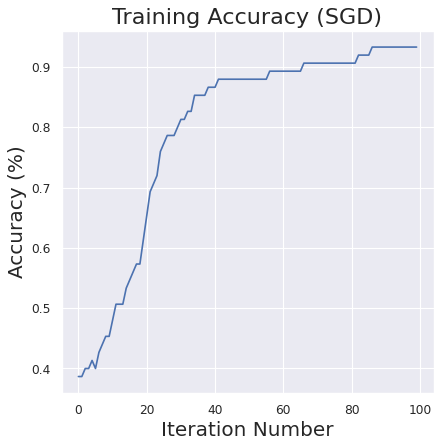

In [ ]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew = svm_test(datatr, targetstr, opt, w, b, "SGD")

In [ ]:
y_target = svm(datatr, wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetstr.detach().numpy(), y_target)

0.9333333333333333

In [ ]:
y_target = svm(datava, wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetsva.detach().numpy(), y_target)

0.92

Adam

Final Loss:  0.0569446279356877
Final Accuracy:  0.9866666666666667


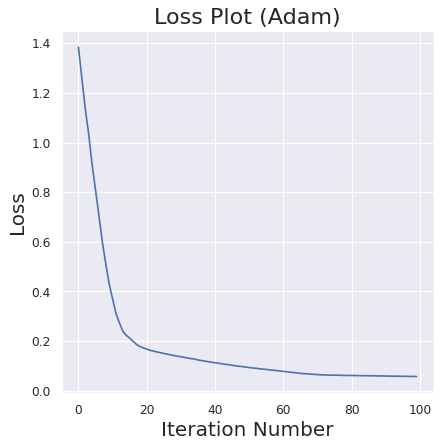

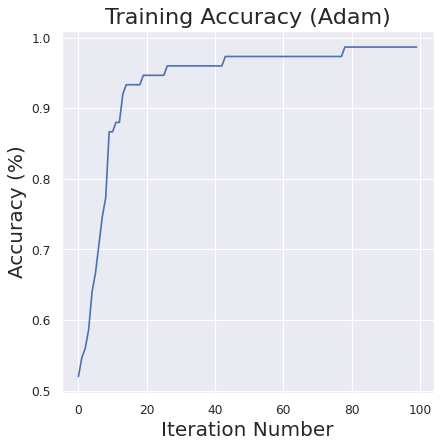

In [ ]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew = svm_test(datatr, targetstr, opt, w, b, "Adam")

In [ ]:
y_target = svm(datatr, wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetstr.detach().numpy(), y_target)

0.9866666666666667

In [ ]:

y_target = svm(datava, wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetsva.detach().numpy(), y_target)

0.88

In [ ]:
def svm_test(X, Y, opt, w, b, name):
    dataset = data.TensorDataset(X, Y) # create your datset
    dataloader = data.DataLoader(dataset, batch_size=25, shuffle=True) # create your dataloader
    Eplot = np.zeros((100, 1))
    Aplot = np.zeros((100, 1))
    for epoch in range(100):
        scores, errors = [], []
        for i, batch in enumerate(dataloader):
            opt.zero_grad()
            y_pred = svm(batch[0], w, b)
            
            y_target = [1 if i > 0 else -1 for i in y_pred]
            scores.append(accuracy_score(batch[1].detach().numpy(), y_target))
            
            output = hinge_loss(y_pred, batch[1].float())
            errors.append(output.data.numpy())
            
            output.backward()
            opt.step()
            
        Aplot[epoch] = np.mean(scores)
        Eplot[epoch] = sum(errors)/(i+1)
    
    return w, b, Aplot, Eplot

SGD Final Loss:  0.26940720280011493
Adam Final Loss:  0.10258849461873372
SGD Final Accuracy:  0.9066666666666666
ADAM Final Accuracy:  0.9333333333333332


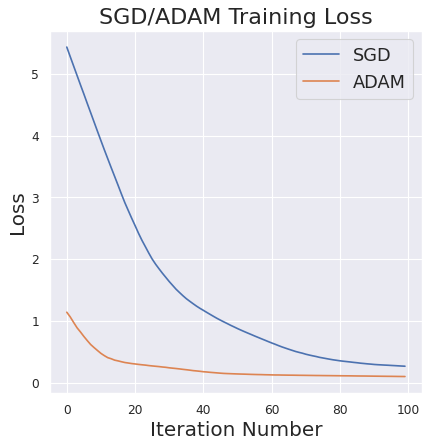

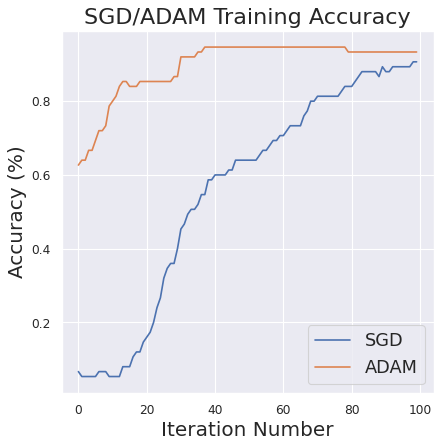

In [ ]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew, A_sgd, E_sgd = svm_test(datatr, targetstr, opt, w, b, "SGD")

w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew, A_ad, E_ad = svm_test(datatr, targetstr, opt, w, b, "Adam")

print("SGD Final Loss: ", E_sgd[99][0])
print("Adam Final Loss: ", E_ad[99][0])
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(E_sgd, label='SGD')
plt.plot(E_ad, label='ADAM')
plt.legend(fontsize=16)
plt.title("SGD/ADAM Training Loss", fontsize=20)
plt.xlabel("Iteration Number", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.savefig("train_loss.svg", format='svg', dpi=1200, bbox_inches='tight')

print("SGD Final Accuracy: ", A_sgd[99][0])
print("ADAM Final Accuracy: ", A_ad[99][0])
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(A_sgd, label='SGD')
plt.plot(A_ad, label='ADAM')
plt.legend(fontsize=16)
plt.title("SGD/ADAM Training Accuracy", fontsize=20)
plt.xlabel("Iteration Number", fontsize=18)
plt.ylabel("Accuracy (%)", fontsize=18)
plt.savefig("train_acc.svg", format='svg', dpi=1200, bbox_inches='tight')

In [ ]:
tr_acc_sgd, tr_acc_ad = [], []
va_acc_sgd, va_acc_ad = [], []
for i in range(0, 100):
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)
    opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
    wnew, bnew, A_sgd, E_sgd = svm_test(datatr, targetstr, opt, w, b, "SGD")
    y_target = svm(datava, wnew, bnew)
    y_target = [1 if i > 0 else -1 for i in y_target]
    tr_acc_sgd.append(A_sgd[99][0])
    va_acc_sgd.append(accuracy_score(targetsva.detach().numpy(), y_target))
    
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)
    opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)
    wnew, bnew, A_ad, E_ad = svm_test(datatr, targetstr, opt, w, b, "Adam")
    y_target = svm(datava, wnew, bnew)
    y_target = [1 if i > 0 else -1 for i in y_target]
    tr_acc_ad.append(A_ad[99][0])
    va_acc_ad.append(accuracy_score(targetsva.detach().numpy(), y_target))
    
print("Training Report: ")
print("Mean SGD accuracy: ", np.mean(tr_acc_sgd), "Mean ADAM accuracy: ", np.mean(tr_acc_ad))
print("Min SGD accuracy: ", min(tr_acc_sgd), "Min ADAM accuracy: ", min(tr_acc_ad))
print("Max SGD accuracy: ", max(tr_acc_sgd), "Max ADAM accuracy: ", max(tr_acc_ad))
print("Validation Report: ")
print("Mean SGD accuracy: ", np.mean(va_acc_sgd), "Mean ADAM accuracy: ", np.mean(va_acc_ad))
print("Min SGD accuracy: ", min(va_acc_sgd), "Min ADAM accuracy: ", min(va_acc_ad))
print("Max SGD accuracy: ", max(va_acc_sgd), "Max ADAM accuracy: ", max(va_acc_ad))

Training Report: 
Mean SGD accuracy:  0.9258666666666667 Mean ADAM accuracy:  0.9638666666666665
Min SGD accuracy:  0.7066666666666667 Min ADAM accuracy:  0.88
Max SGD accuracy:  0.9866666666666667 Max ADAM accuracy:  0.9866666666666667
Validation Report: 
Mean SGD accuracy:  0.9072 Mean ADAM accuracy:  0.9004000000000001
Min SGD accuracy:  0.76 Min ADAM accuracy:  0.88
Max SGD accuracy:  1.0 Max ADAM accuracy:  1.0


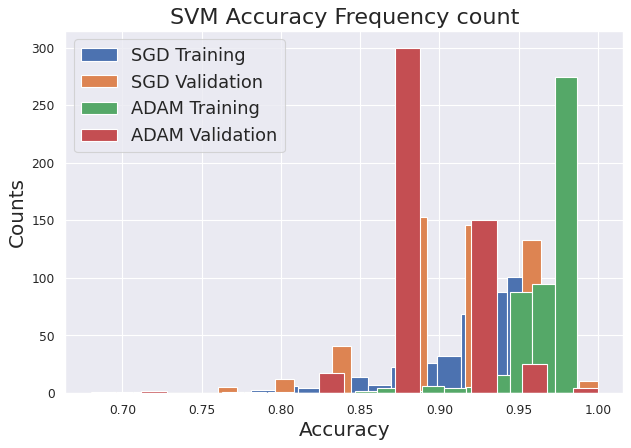

In [ ]:
plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(tr_acc_sgd, bins=20, label='SGD Training')
plt.hist(va_acc_sgd, bins=20, label='SGD Validation') 
plt.hist(tr_acc_ad, bins=20, label='ADAM Training')
plt.hist(va_acc_ad, bins=20, label='ADAM Validation') 
plt.title("SVM Accuracy Frequency count", fontsize=20)
plt.ylabel('Counts', fontsize=18)
plt.xlabel('Accuracy', fontsize=18)
plt.legend(fontsize=16)
plt.savefig("svm_frequency.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

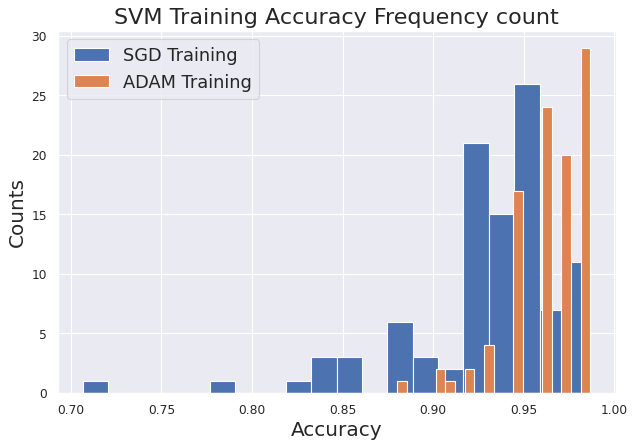

In [ ]:
plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(tr_acc_sgd, bins=20, label='SGD Training')
plt.hist(tr_acc_ad, bins=20, label='ADAM Training')
plt.title("SVM Training Accuracy Frequency count", fontsize=20)
plt.ylabel('Counts', fontsize=18)
plt.xlabel('Accuracy', fontsize=18)
plt.legend(fontsize=16)
plt.savefig("svm_frequency_train.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

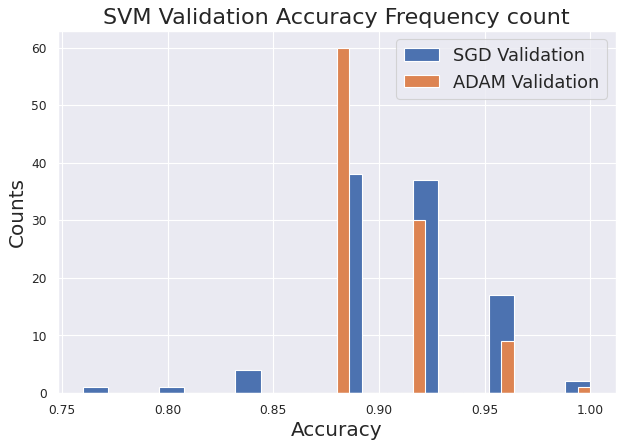

In [ ]:
plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(va_acc_sgd, bins=20, label='SGD Validation') 
plt.hist(va_acc_ad, bins=20, label='ADAM Validation') 
plt.title("SVM Validation Accuracy Frequency count", fontsize=20)
plt.ylabel('Counts', fontsize=18)
plt.xlabel('Accuracy', fontsize=18)
plt.legend(fontsize=16)
plt.savefig("svm_frequency_valid.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

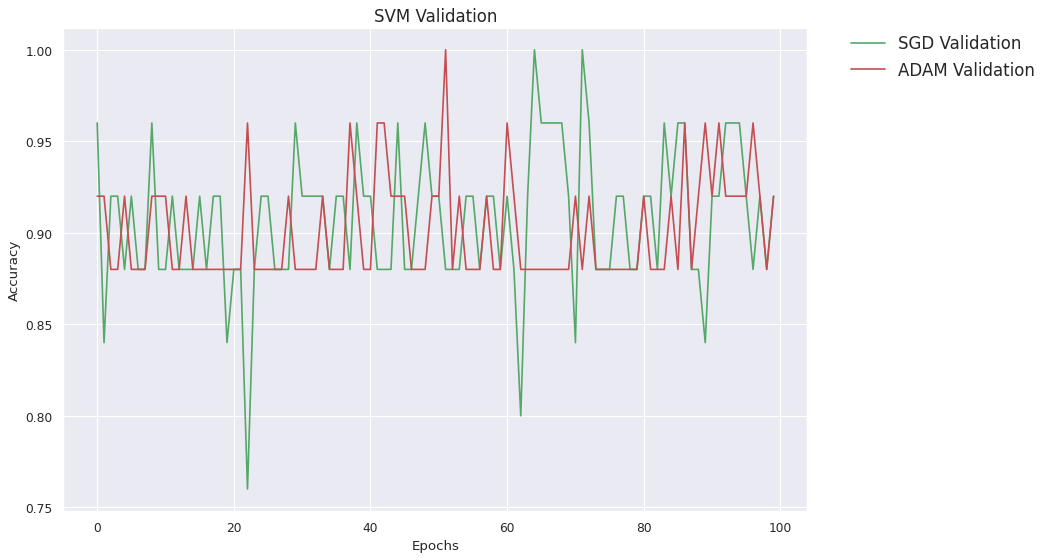

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(va_acc_sgd, label='SGD Validation', color="g") 
plt.plot(va_acc_ad, label='ADAM Validation', color="r") 
plt.title("SVM Validation", fontsize=15)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
#plt.legend(fontsize=16)
plt.legend(fontsize=15, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., facecolor='w', edgecolor ='w')
#plt.savefig("svm_frequency_valid.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

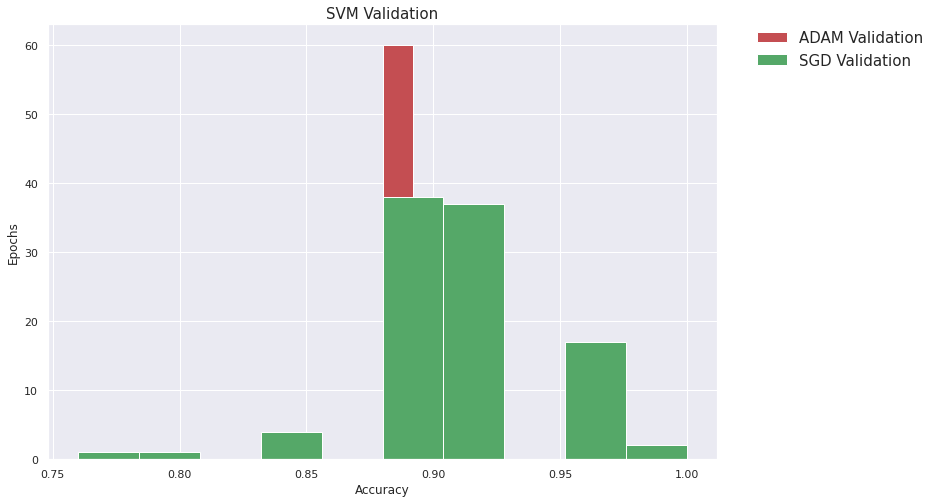

In [ ]:
plt.figure(num=None, figsize=(12, 8))
plt.hist(va_acc_ad, label='ADAM Validation', color="r") 
plt.hist(va_acc_sgd, label='SGD Validation', color="g") 
plt.title("SVM Validation", fontsize=15)
plt.ylabel('Epochs', fontsize=12)
plt.xlabel('Accuracy', fontsize=12)
#plt.legend(fontsize=16)
plt.legend(fontsize=15, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., facecolor='w', edgecolor ='w')
#plt.savefig("svm_frequency_valid.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()